In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_excel(r'C:\Users\syzha\Downloads\new3.7-OPS-PM Baseline Cost (Synthetic).xlsx')
df.head()

,Order Number,Change Request Title,Work Classification,Priority,Application Name,IT Directorate,IT Division,IT Section,Manager ID,Effort Cost,Capacity to Deliver,Actuals
0,161454,Sub-Project-1,Development,Low,Application A,DIR-1,Div-1,Sec-1,485317370,149149.421875,Yes,470545.583046
1,161454,Sub-Project-1,Development,Low,Application B,DIR-2,Div-2,Sec-2,485317562,35203.480469,Yes,8830.170000
2,161454,Sub-Project-1,Development,Low,Application C,DIR-1,Div-3,Sec-3,486437960,30286.000000,Yes,69890.006667
3,161454,Sub-Project-1,Development,Low,Application D,DIR-3,Div-4,Sec-4,484909766,34726.000000,Yes,13018.633333
4,161454,Sub-Project-1,Development,Low,Application E,DIR-4,Div-5,Sec-5,485093174,0.000000,No,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          64 non-null     int64  
 1   Change Request Title  64 non-null     object 
 2   Work Classification   64 non-null     object 
 3   Priority              64 non-null     object 
 4   Application Name      64 non-null     object 
 5   IT Directorate        64 non-null     object 
 6   IT Division           64 non-null     object 
 7   IT Section            64 non-null     object 
 8   Manager ID            64 non-null     int64  
 9   Effort Cost           64 non-null     float64
 10  Capacity to Deliver   64 non-null     object 
 11  Actuals               64 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 6.1+ KB


In [4]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60     True
61    False
62    False
63    False
Length: 64, dtype: bool

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode each categorical column separately and assign to new columns
df['Order Number_LabelEncoded']= le.fit_transform(df['Order Number '])
df['Change Request Title_LabelEncoded'] = le.fit_transform(df['Change Request Title'])
df['Work Classification_LabelEncoded'] = le.fit_transform(df['Work Classification'])
df['Priority_LabelEncoded'] = le.fit_transform(df['Priority'])
df['Application Name_LabelEncoded'] = le.fit_transform(df['Application Name'])
df['IT Directorate_LabelEncoded']= le.fit_transform(df['IT Directorate'])
df['IT Division_LabelEncoded']= le.fit_transform(df['IT Division'])
df['IT Section_LabelEncoded']= le.fit_transform(df['IT Section'])
df['Manager ID_LabelEncoded']= le.fit_transform(df['Manager ID'])

df['Capacity to Deliver_LabelEncoded']=le.fit_transform(df['Capacity to Deliver'])

df_en=df[['Order Number_LabelEncoded','Change Request Title_LabelEncoded', 'Work Classification_LabelEncoded','Priority_LabelEncoded','Application Name_LabelEncoded','IT Directorate_LabelEncoded','IT Division_LabelEncoded','IT Section_LabelEncoded','Manager ID_LabelEncoded','Effort Cost','Capacity to Deliver_LabelEncoded','Actuals']]

# Display the encoded values
df_en.head(20)


,Order Number_LabelEncoded,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost,Capacity to Deliver_LabelEncoded,Actuals
0,12,0,0,2,0,0,0,0,16,149149.421875,1,470545.583046
1,12,0,0,2,1,1,6,11,18,35203.480469,1,8830.170000
2,12,0,0,2,2,0,7,22,23,30286.000000,1,69890.006667
3,12,0,0,2,3,2,8,25,6,34726.000000,1,13018.633333
4,12,0,0,2,4,3,9,26,9,0.000000,0,0.000000
5,12,0,0,2,0,0,0,27,17,30544.000000,1,14789.150594
6,12,0,0,2,5,0,10,28,4,39062.379883,1,51832.860000
7,12,0,0,2,6,0,10,29,1,94317.500000,1,150693.837598
8,12,0,0,2,7,0,0,30,3,49126.000000,1,74047.011038
9,12,0,0,2,8,0,7,1,24,35262.000000,1,67243.407395


In [7]:
# seperate input features in x
x = df_en.drop(['Order Number_LabelEncoded','Actuals'], axis=1)

# store the target variable in y
y = (df_en['Actuals'] - df_en['Effort Cost']) / df_en['Effort Cost']


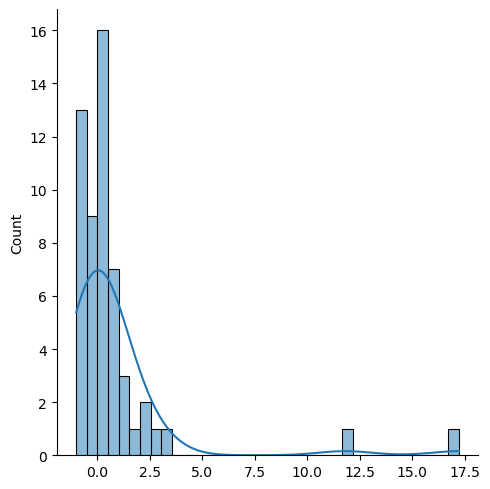

In [10]:
#dist plot for cost difference ratio
sns.displot(y, kde=True)

<Axes: xlabel='Actuals', ylabel='Effort Cost'>

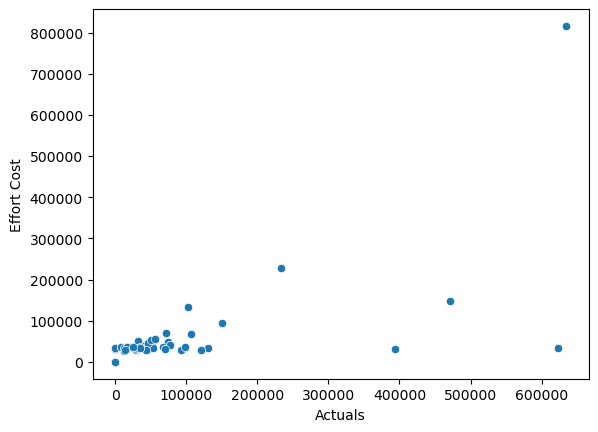

In [10]:
sns.scatterplot( data=df_en, x='Actuals', y='Effort Cost')


In [11]:
x

,Change Request Title_LabelEncoded,Work Classification_LabelEncoded,Priority_LabelEncoded,Application Name_LabelEncoded,IT Directorate_LabelEncoded,IT Division_LabelEncoded,IT Section_LabelEncoded,Manager ID_LabelEncoded,Effort Cost,Capacity to Deliver_LabelEncoded
0,0,0,2,0,0,0,0,16,149149.421875,1
1,0,0,2,1,1,6,11,18,35203.480469,1
2,0,0,2,2,0,7,22,23,30286.000000,1
3,0,0,2,3,2,8,25,6,34726.000000,1
4,0,0,2,4,3,9,26,9,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
58,3,1,3,1,1,6,20,18,35326.299805,1
59,3,1,3,23,5,5,21,20,29526.000000,1
61,3,1,3,24,5,5,23,21,34576.000000,1
62,4,0,3,25,1,12,24,19,36588.000000,1


In [12]:
y

0     2.154860
1    -0.749168
2     1.307667
3    -0.625104
4          NaN
        ...   
58   -0.000159
59   -0.506855
61    0.015902
62   -0.299851
63    0.019198
Length: 63, dtype: float64

In [13]:
y=y.fillna(0)
y

0     2.154860
1    -0.749168
2     1.307667
3    -0.625104
4     0.000000
        ...   
58   -0.000159
59   -0.506855
61    0.015902
62   -0.299851
63    0.019198
Length: 63, dtype: float64

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the datase
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=234)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rfmodel = rf.fit(x_train,y_train)

In [17]:
ytrain_pred = rfmodel.predict(x_train)
ytrain_pred


array([-7.49167699e-03,  5.25026361e-01,  2.51943728e+00,  7.28732280e-01,
        2.42931705e-02,  1.25469496e+00,  7.56638386e-01, -1.70081079e-01,
       -7.49326782e-03, -2.29105643e-01, -1.73269072e-01,  2.02918839e+00,
        1.11986271e-01, -2.56120723e-01,  1.45101819e+00,  1.94391531e-02,
        1.01865438e+00, -5.87396594e-01,  7.53085315e+00,  1.10309844e+01,
        1.05605136e+00,  1.53212685e+00,  3.83046036e-01,  8.92933967e-01,
        1.90449009e-01,  3.72054975e-02,  7.66097349e-01,  2.11700510e+00,
        4.46472605e-01,  8.72406234e-01,  6.70768577e-01, -3.73041148e-03,
       -6.03545651e-02, -1.69397548e-01, -3.60811427e-01,  2.35857070e-01,
        1.04755435e+00,  7.85966163e-01,  2.30086412e-01,  7.68679016e-01,
        2.72499712e+00,  3.85432369e-01,  3.08706066e-02, -4.88928764e-01,
        1.11417953e+00,  1.54315391e-02,  4.26280488e-03,  3.40753322e-02,
       -5.90742043e-01,  6.11931415e-01])

In [18]:
np.set_printoptions(precision=3, suppress=True)
ytrain_pred

array([-0.007,  0.525,  2.519,  0.729,  0.024,  1.255,  0.757, -0.17 ,
       -0.007, -0.229, -0.173,  2.029,  0.112, -0.256,  1.451,  0.019,
        1.019, -0.587,  7.531, 11.031,  1.056,  1.532,  0.383,  0.893,
        0.19 ,  0.037,  0.766,  2.117,  0.446,  0.872,  0.671, -0.004,
       -0.06 , -0.169, -0.361,  0.236,  1.048,  0.786,  0.23 ,  0.769,
        2.725,  0.385,  0.031, -0.489,  1.114,  0.015,  0.004,  0.034,
       -0.591,  0.612])

In [19]:
ytest_pred = rfmodel.predict(x_test)
ytest_pred

array([-0.161,  0.769,  0.704,  0.709,  0.327,  1.72 ,  0.037,  0.855,
        1.43 ,  0.939,  0.455, -0.176,  0.158])

In [20]:
from sklearn.metrics import mean_absolute_error
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

0.5280981986095078

In [21]:
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

0.7726408916868893

In [22]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(ytrain_pred, y_train)
train_mse

1.408794431909871

In [23]:
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(ytest_pred, y_test)
test_mse

1.0620603520714613

In [24]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, ytrain_pred)
r2_train

0.8403252720112864

In [25]:
r2_test = r2_score(y_test, ytest_pred)
r2_test

-1.2792974019237469

In [26]:

from sklearn.model_selection import cross_val_score
import numpy as np

# Perform k-fold cross-validation
# Here, we use 5-fold cross-validation
cv_scores = cross_val_score(rf, x, y, cv=3, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -cv_scores

# Access the cross-validation scores
print("Training Set Cross-validation scores:", mse_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_cv_score = mse_scores.mean()
std_cv_score = mse_scores.std()
print(f"Mean cross-validation score (MSE): {mean_cv_score:.2f}")


Training Set Cross-validation scores: [15.073  1.258  7.956]
Mean cross-validation score (MSE): 8.10


In [27]:

# Assuming x, y, rfmodel, and mse_scores are already defined

# Calculate mean squared error (MSE)
mse_scores = -cv_scores
mean_mse = mse_scores.mean()

# Calculate mean absolute error (MAE)
mae_scores = cross_val_score(rf, x, y, cv=3, scoring='neg_mean_absolute_error')
mean_mae = -mae_scores.mean()  # Convert the negative scores to positive values

# Calculate R-squared (R2)
r2_scores = cross_val_score(rf, x, y, cv=3, scoring='r2')
mean_r2 = r2_scores.mean()

# Print the results
print(f'Mean Squared Error (MSE): {mean_mse:.2f}')
print(f'Mean Absolute Error (MAE): {mean_mae:.2f}')
print(f'R-squared Score (R^2): {mean_r2:.2f}')

Mean Squared Error (MSE): 8.10
Mean Absolute Error (MAE): 1.20
R-squared Score (R^2): -0.46
